# Lecture 4: Time Series Analysis

Time series analysis is a very useful tool in financial engineering, especially when trying to extract a trend out of a stochastic process, calculate a smooth series (such as those "indicators" eg. SMA, EMA, etc), and forecast future developements of a time series. This notebook should hopefully cover all of these tasks and beyond. 

The main topics of discussion are:

 1. Introduction to TSA
 2. Characteristics of time series
 3. Selected time series models
 4. Model Diagnostics
 5. Volatility Forecasting
 



In [1]:
#Importing standard libraries


import numpy as np
from matplotlib import pyplot as plt 
import scipy as sci
import pandas as pd

## Introduction to Time Series Analysis

A time series $(Y_t)_{t \geq 0} = (\dots,Y_{-2},Y_{-1},Y_0,Y_1,Y_2, \dots)$ is defined as a realization of a stochastic process at equidistantly spaced points in time. A univariate time series can be described by a sequence $(y_1,y_2,\dots,y_T)$ or in short $(y_t)^T_{t = 1}$. The random variable $Y_t$ is assumed to be metric and the process is assumed to be stationary (invariant under a time transformation $t \rightarrow t+h$, where $h$ is a lag).

By looking at, say, the SP500 index chart in a multi-decade long timeframe, one can see that there are trends, cycles, seasonalities, etc. This is why it makes sense to use TSA to study financial data. One can then study the volatilities in various seasons, etc.


The standard models of a time series assume additive components such as trends, cycles, seasonalities, etc as well as a stochastic component. The simplest trend model one could think of is the following:

$$y_t = d_t + u_t$$

where $d_t$ is some deterministic trend and $u_t$ being a stochastic stationary factor (usually assumed to be _white noise_, or $u_t \sim N(0,\sigma^2)$)


#### Python Implementation

Say we have a linear trend $d_t = x$ and gaussian noise as a stochastic factor $u_t \sim N(0,1)$. We could then model the time series $y_t$ as follows:

In [112]:
T = range(0,40) #time

d_t = T #trend 

y_t = [i + np.random.normal(0,1) for i in T] #time series


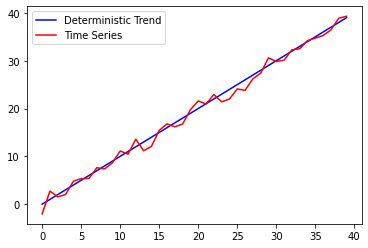

In [113]:
plt.plot(t,d_t,color='blue',label='Deterministic Trend')
plt.plot(t,y_t,color='red',label='Time Series')
plt.legend()

The example above is likely the simplest possible model, although one can make it additive by adding seasonal factors and cycles (think, sine function for example). The result will be 

$$y_t = d_t + s_t + u_t$$

where $s_t$ represent a seasonal component. 


As mentioned informally in the very top of this notebook, a typical goal in TSA is to extract $d_t$ and $s_t$ out of $y_t$. This could be achieved by

 1. Calculating the estimates $\hat{d_t}$ and $\hat{s_t}$
 2. Calculating the time series of the residuals as $\hat{u_t} = y_t - \hat{d_t} -\hat{s_t}$
 
If $\hat{u_t}$ then satisfies assumptions (i.e $\hat{u_t} \sim WN(\mu,\sigma^2)$), then the estimates are accurate. If it is not accurate, then there is likely some error in $\hat{d_t}$ and/or $\hat{s_t}$.


Another way to "detrend the model" is to apply what is known as the _lag operator_ $\tilde{y_t}$. For a linear trend (such as the example above), the lag operator should simply be

$$\tilde{y_t} = y_t - y_{t - 1}$$


#### Python Implementation 

Say 

$$y_1 = t + s_t$$

and 

$$y_2 = (t + 1) + s_t$$

Let us try to apply a lag operator

Mu = 0.9386623938287754, Sigma = 1.3685318390828485


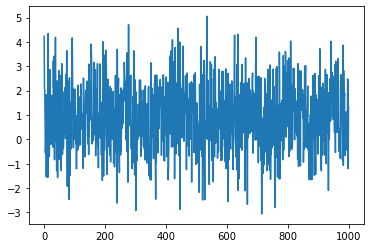

In [121]:
T = range(0,1000) #time



y_1 = np.array([i + np.random.normal(0,1) for i in T])
y_2 = np.array([i + 1 + np.random.normal(0,1) for i in T])


lag_op = y_2 - y_1 

plt.plot(T,lag_op)
print("Mu = "+str(np.mean(lag_op))+", Sigma = "+str(np.std(lag_op)))